In [ ]:
%pylab inline
import Template, Analysis
t = {'t':Template.Template(np.zeros(10)),}

In [ ]:
print '%20s' % 'NAME', '%25s' % 'LIMITS', '%10s' % 'VALUE', '%10s' % 'FIX_NORM', '%10s' % 'FIX_SPEC'
for key in t:
            temp = t[key]
            print '%20s' % key, '%25s' % temp.limits, '%10s' % temp.value, '%10s' % temp.fixNorm, '%10s' % temp.fixSpectrum

In [ ]:
reload(Analysis)

A = Analysis.Analysis()
A.AddPointSourceTemplate()

In [ ]:
A.AddTemplate('test',np.zeros(10))
A.AddTemplate('test2',np.zeros(10))

A.PrintTemplates()

A.RemoveTemplate('test')
A.PrintTemplates()

In [ ]:
E,flux,fluxUnc = np.genfromtxt('iso_clean_v05.txt').T




# Build a power law interpolator
fluxInterp = lambda x: np.exp(np.interp(np.log(x),np.log(E),np.log(flux)))
fluxUncInterp = lambda x: np.exp(np.interp(np.log(x),np.log(E),np.log(fluxUnc)))

fluxInterp(1)

In [ ]:
f = np.zeros(shape=(1000,1000))
f2 = np.zeros(shape=(100,100))


%timeit f[:100,:100]*f[:100,:100]
%timeit f2*f2

In [ ]:
a = np.ones(shape=(2,3,3))
print np.inner([2,3],a)

In [ ]:
import Template, Analysis, Likelihood
reload(Analysis)
A = Analysis.Analysis()

In [ ]:
A.AddIsotropicTemplate()
A.BinPhotons()
A.AddPointSourceTemplate()
A.GenSquareMask(l_range=[-20,20],b_range=[-20,20],plane_mask=2)
A.PrintTemplates()

In [ ]:
import GammaLikelihood as like
reload(like)
#healpy.mollview(A.binned_data[10])

m, res = like.RunLikelihood(A,print_level=2,use_basinhopping=True)

In [ ]:
for i in range(24):
    print np.mean(A.templateList['PSC'].healpixCube[i]),np.mean(A.binned_data[i])

In [ ]:
print m.fitarg
norms=[]
bins = []
for i in range(24):
    bins.append(A.bin_edges[i])
    norms.append( m.fitarg['PSC_'+str(i)])
    
plt.loglog(bins,norms)    

print A.mask
idx = np.where(A.mask!=0)[0]
np.mean(A.binned_data[0,idx])

In [ ]:
print list(A.bin_edges

In [ ]:
x = np.vectorize(log)
%timeit np.log(a)
%timeit np.sum(a)

In [ ]:
print len(np.nonzero(A.GenSquareMask(l_range=[-20,20],b_range=[-20,20],plane_mask=2))[0])
print np.shape(np.nonzero(A.mask))

In [ ]:
import pycuda.driver as drv
import pycuda.tools
import pycuda.autoinit
import numpy
import numpy.linalg as la
from pycuda.compiler import SourceModule

mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
#multiply_them(
#        drv.Out(dest), drv.In(a), drv.In(b),
#        block=(40000,1,1))

#print dest-a*b

%timeit multiply_them(drv.Out(dest), drv.In(a), drv.In(b),block=(400,1,1))

%timeit a*b

In [ ]:
import pycuda.driver as drv

In [ ]:
import numpy as np
import cudamat as cm

cm.cublas_init()

# create two random matrices and copy them to the GPU
a = cm.CUDAMatrix(np.random.rand(320, 2560))
b = cm.CUDAMatrix(np.random.rand(2560, 320))

# perform calculations on the GPU
%timeit c = cm.dot(a, b)
%timeit d = c.sum(axis = 0)



a = np.random.rand(320, 2560)
b = np.random.rand(2560, 320)

%timeit np.dot(a,b)
%timeit np.sum(b)

# copy d back to the host (CPU) and print
print d.asarray()

In [ ]:
a = cm.CUDAMatrix(np.random.rand(24, 26786))
b = cm.CUDAMatrix(np.random.rand(24, 26786))

cm.dot(a,b.T)
%timeit cm.log(a).asarray()

In [ ]:
a = np.random.rand(320, 2560)
%timeit cm.CUDAMatrix(a)

In [ ]:
a = cm.CUDAMatrix(np.zeros((2, 2)))
a.add(np.e**2 target=)
print cm.log(a).asarray()
print a.asarray()

In [ ]:
b, l = np.deg2rad((b,l))
d = np.rad2deg(np.arctan2(np.sqrt(np.square(np.cos(b)*np.sin(l) )+np.square(np.sin(b))),np.cos(b)*np.cos(l) ))
print d

In [ ]:
np.sqrt((20**2+20**2))

In [ ]:
import DM
import healpy
reload(DM)
healpy.cartview(DM.GenNFW(decay=False, axesratio=1,offset=(0,0),mult_solid_ang=True))
#healpy.cartview(DM.GenNFW(),latra=(-30,30),lonra=(-30,30))

import Template, Analysis
import GammaLikelihood as like
reload(Analysis)
A = Analysis.Analysis()
A.BinPhotons()

In [ ]:
import pyfits
hdu = pyfits.open('/data/fermi_data_1-8-14/gtsrcmap_ALL_BOTH.fits')
hdu.info()

plt.imshow(np.log10(hdu[0].data[0]),origin='lower',extent=[-180,180,-90,90])
plt.xlim(180,-180)
plt.colorbar()
plt.show()

healpy.cartview(np.log10(A.binned_data[0]),)

In [ ]:
print A.bin_edges


0 (0.0, 1.7672495)
1 (1.7672495, 3.5248926)
2 (3.5248926, 5.5203085)
3 (5.5203085, 7.5050545)
4 (7.5050545, 9.5)
5 (9.5, 11.5)
6 (11.5, 13.5)
7 (13.5, 15.5)
8 (15.5, 50.0)
-0.00843384


<matplotlib.colorbar.Colorbar instance at 0x7f37c62c9878>

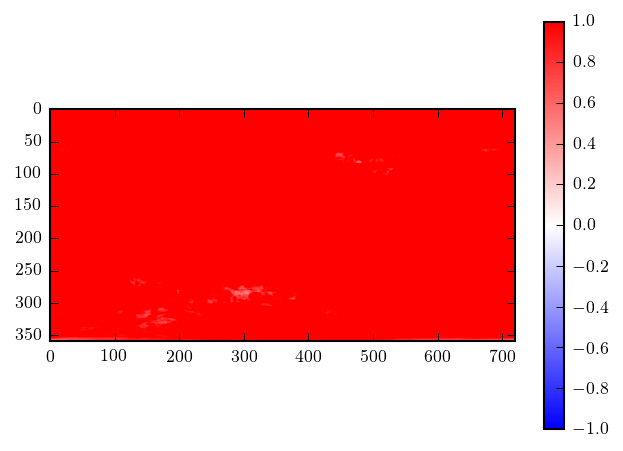

In [32]:
for i,item in enumerate(list(pyfits.open('/data/galprop2/FITS/rbands_hi12_v5_hdeg_zmax1_Ts125.fits.gz')[1].data)):
    print i, item

    
#plt.imshow(pyfits.open('/data/galprop2/FITS/rbands_co10mm_v3_2001_qdeg.fits.gz')[0].data[0] )
plt.imshow(np.sum(pyfits.open('/data/galprop2/FITS/rbands_hi12_v5_hdeg_zmax1_Ts125.fits.gz')[0].data, axis=0), cmap='bwr', vmin=-1,vmax=1)
print np.min(pyfits.open('/data/galprop2/FITS/rbands_hi12_v5_hdeg_zmax1_Ts125.fits.gz')[0].data)

plt.colorbar()



In [61]:
import healpy

def ReadFits(fname):
    hdu = pyfits.open(fname)
    return np.array([hdu[1].data.field(i) for i in range(len(hdu[1].data[0]))])

d1 = ReadFits('/data/galprop2/output/pi0_decay_healpix_54_Lorimer_z6kpc_R20kpc_Ts100000K_EBV5mag.gz')
d2 = ReadFits('/data/galprop2/output/pi0_decay_healpix_54_NSPEB_H2_8500.gz')


2.18134244332e-18


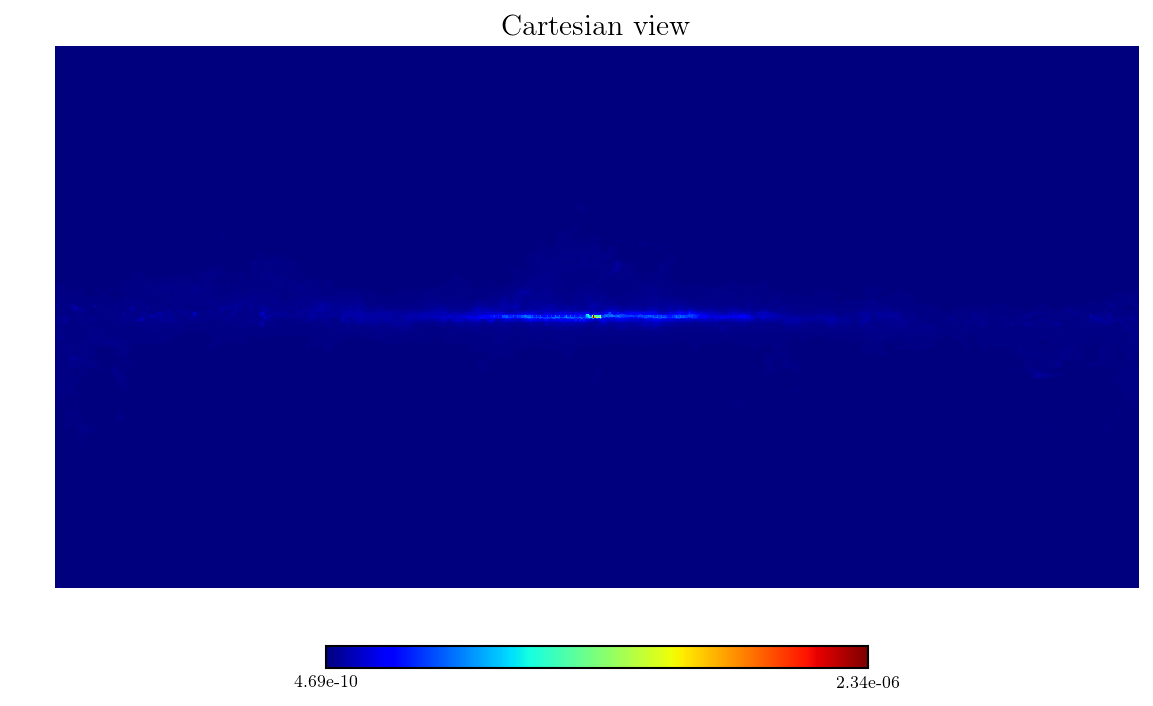

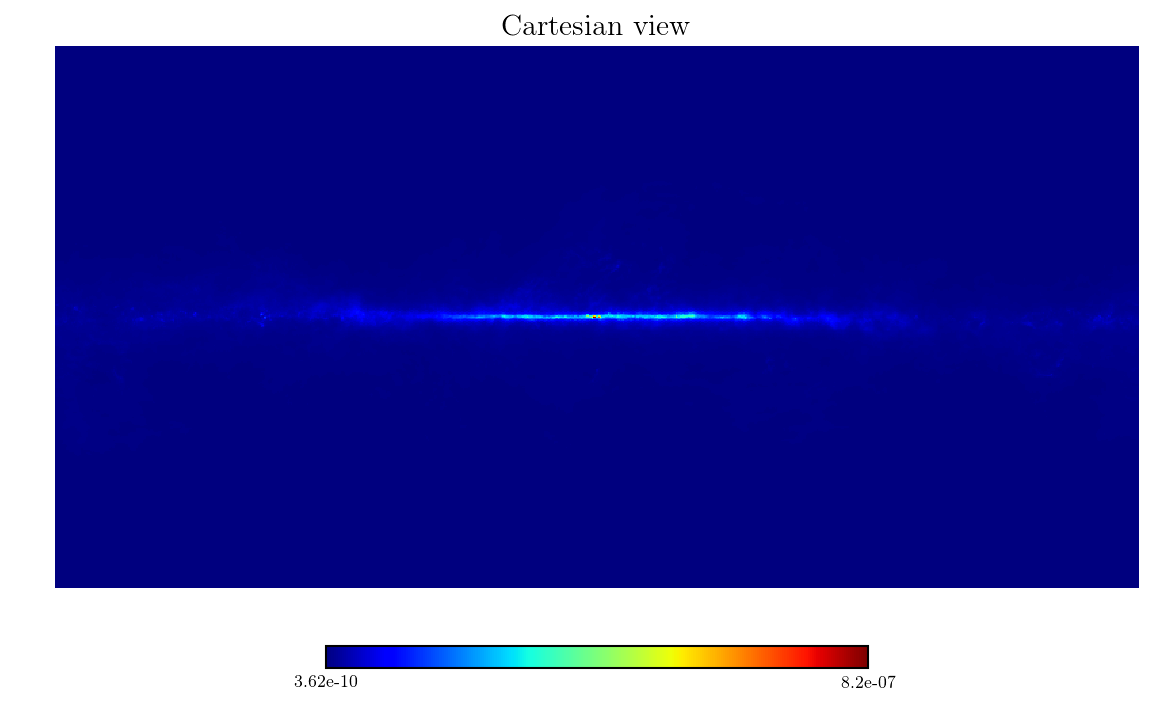

In [63]:
healpy.cartview(d[10])
healpy.cartview(d2[10])
print np.min(d2)


In [66]:
def ReadFits(fname, length):
    d = pyfits.open(fname)[1].data
    return np.array([d.field(i) for i in range(length)])

%time ReadFits('/data/galprop2/output/bremss_H2R_ring_1_healpix_54_NSPEB_H2_8500.gz', 38)

CPU times: user 1.94 s, sys: 181 ms, total: 2.12 s
Wall time: 2.12 s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [78]:
d1 = pyfits.open('/data/galprop2/FITS/HI_NS_galprop_r8500_interp1.fits.gz')[0].data
d2 = pyfits.open('/data/galprop2/FITS/HI_NS_galprop_r8500_interp0.fits.gz')[0].data

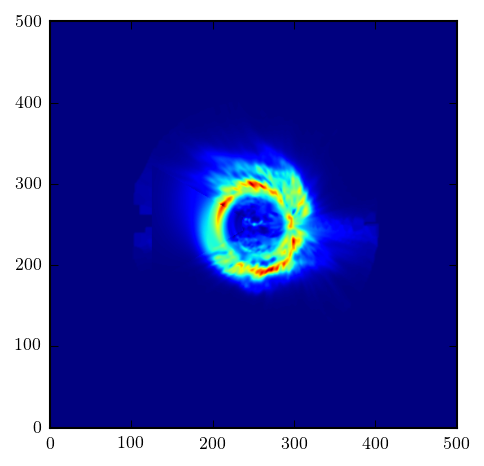

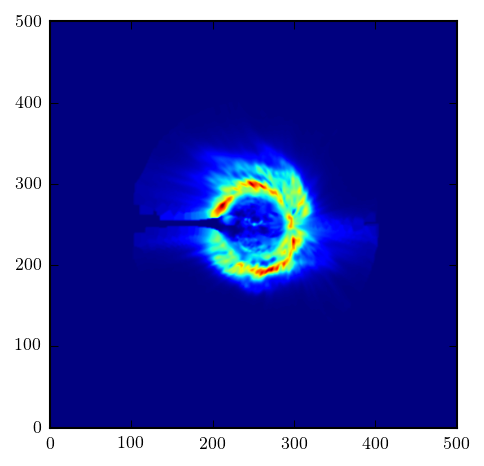

In [80]:
plt.imshow(np.sum(d1, axis=0), origin='lower')
plt.show()
plt.imshow(np.sum(d2, axis=0), origin='lower')

In [1]:
pyfits.open('/data/galprop2/FITS/rbands_hi12_v5_hdeg_zmax1_Ts125.fits.gz')[0].header.cards

('SIMPLE', True, 'Written by IDL:  Mon Jan  3 10:37:25 2011')
('BITPIX', -32, '')
('NAXIS', 3, '')
('NAXIS1', 720, '')
('NAXIS2', 360, '')
('NAXIS3', 9, '')
('EXTEND', True, '')
('CRVAL1', 0.25, '')
('CDELT1', 0.5, '')
('CRPIX1', 1.0, '')
('CTYPE1', 'GLON', '')
('CRVAL2', -89.75, '')
('CDELT2', 0.5, '')
('CRPIX2', 1.0, '')
('CTYPE2', 'GLAT', '')
('CRVAL3', 0, '')
('CDELT3', 1, '')
('CRPIX3', 1.0, '')
('CTYPE3', 'Rband', '')
('DATAMIN', -0.00843384, '')
('DATAMAX', 293.666, '')
('BUNIT', '10e20 cm-2', '')
('PIXCENT', True, '')
('HISTORY', 'N(H I) from the LAB survey, Tspin = 125K assumed', '')
('HISTORY', '3rd axis is range of Galactocentric distance (kpc)', '')
('HISTORY', 'Rotation curve of Clemens (1985) with Rsun=8.5 kpc, Vsun=220 km/s', '')
('HISTORY', 'Rmin, Rmax values for each annulus are stored in the extension', '')
('HISTORY', 'Emission at |z| > 1.00000 kpc is assigned to local annulus', '')
('HISTORY', 'Written by rbands_hi12_v5.pro', '')

In [5]:
import h5py

def AddMetadata(fname, basedir, tag):
    # Parse the galprop file into a dict.
    galdef_dict = {}
    with open(basedir + '/galdef_54_'+tag) as galdef:
        for line in galdef: 
            if line[0] != "#" and line.strip()!='':
                s = line.strip('\n').split('=')
                if len(s)<2: 
                    continue
                key = s[0].strip()
                if key in ["Title", 'X_CO_values', 'n_X_CO_values', 'X_CO_radius']: continue
                galdef_dict[key] = s[1].strip().split(" ")[0]
    try: h5.close() 
    except: pass
    h5 = h5py.File(fname, 'a')
    galdef_group = h5.create_group("galdef")
    for key, val in galdef_dict.items():
        print key, val
        galdef_group.attrs[key]=val
    h5.close()

AddMetadata('test.hdf5',basedir='/data/galprop2/GALDEF/', tag='base')
            

nuc_g_2 2.38735
control_diagnostics 0
nuc_g_1 1.87944
iso_abundance_15_031 4.242
iso_abundance_18_040 0.001744
d_lat 0.25
cr_source_w_01 0.1
Ekin_factor 1.2
K_capture 1
use_Z_30 0
B_field_name galprop_original
iso_abundance_27_059 2.214
source_model 1
D0_xx 8.3e+28
ISRF_healpixOrder 1
spiral_fraction +0.0
iso_abundance_10_020 312.5
verbose 0
SNR_electron_sdg 0.00
iso_abundance_10_021 0.003556
electron_norm_Ekin 3.45e4
iso_abundance_14_030 24.68
DM_int0 1
network_iter_compl 2
iso_abundance_17_037 0.001167
iso_abundance_17_035 0.7044
iso_abundance_19_041 0.0003339
iso_abundance_19_040 3.022
gamma_rays 2
iso_abundance_02_003 9.033
iso_abundance_03_006 0
iso_abundance_03_007 0
SNR_nuc_dgpivot 5.0e3
use_Z_27 1
GCR_data_filename GCR_data_4.dat
source_radius 0
skymap_format 3
cr_source_z_02 0.2
cr_source_z_01 0.1
iso_abundance_14_029 35.02
t_half_limit 1.0e4
n_source_values 0
dz 0.25
cr_source_w_02 2.4
dx 1
dy 1
iso_abundance_10_022 100.1
X_CO 2.0E20
iso_abundance_07_015 5.961e-05
iso_abundan

''

In [12]:
import h5py

h5 = h5py.File('test.hdf5')
#h5.create_dataset('/fit_results/lonscan.', data=[])
fa = h5['/'].attrs
fa.create('spectra', {'name':1, 'test':2}.items())

In [15]:
print h5['/'].attrs['spectra']

[['test' '2']
 ['name' '1']]


In [19]:
np.linspace(-20,20,41)

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

DM.py:246: RuntimeWarning: invalid value encountered in sin
  solidAngle = healpy.pixelfunc.nside2pixarea(nside)
DM.py:246: RuntimeWarning: invalid value encountered in cos
  solidAngle = healpy.pixelfunc.nside2pixarea(nside)


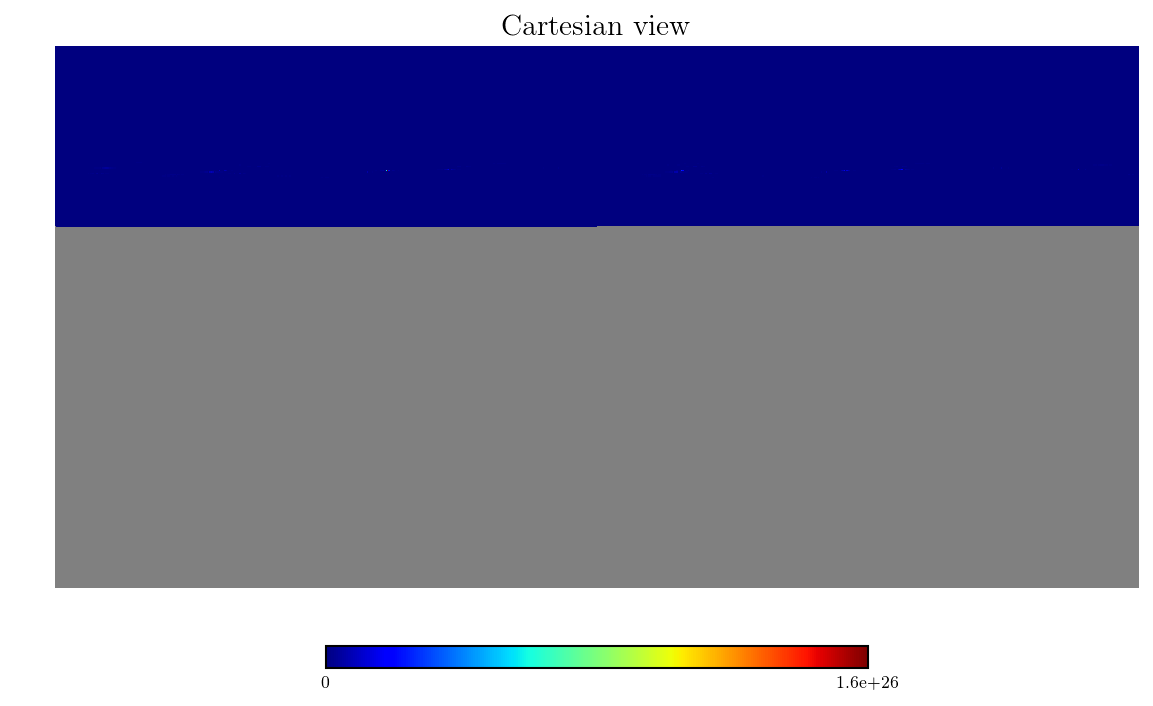

In [20]:
import DM
reload(DM)


import healpy
m = healpy.cartview(DM.GenNFW(axesratio=1, gamma=1.25, nside=512,res=.125/2.), return_projected_map=True)


(1000, 2000)


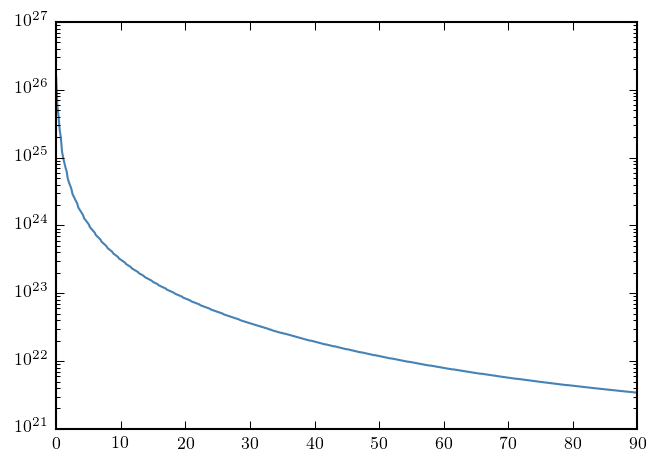

In [17]:

print m.shape

psi = np.linspace(0,90,500)
plt.plot(psi, m[500:,1000])
plt.yscale('log')
import pickle
pickle.dump((psi, m[500:,1000]),open('DM_radial_profile_alph_1.25.pickle', 'wb'))

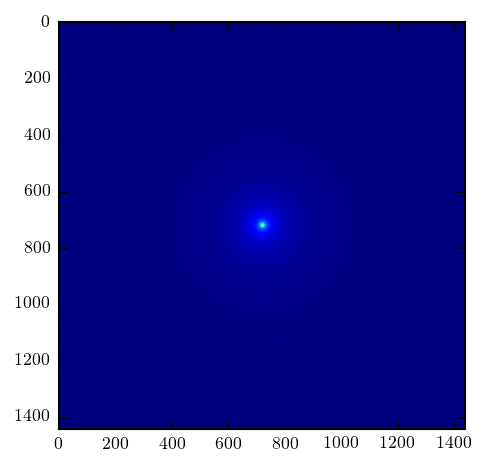

In [2]:
import DM
reload(DM)

m = DM.GenNFW(axesratio=1, gamma=.75,res=.125, cartesian=True, size=90,)
plt.imshow(m)



(1440, 1440)


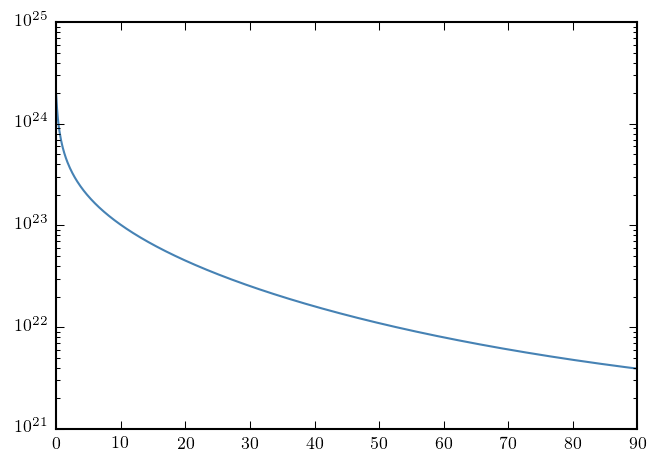

In [7]:
psi = np.linspace(0,90,90*8)

print m.shape
plt.plot(psi, m[720:,720])
plt.yscale('log')
import pickle
pickle.dump((psi, m[720:,720]),open('DM_radial_profile_alph_.75.pickle', 'wb'))

In [47]:
import healpy 

hdu_k = pyfits.open('./testing_temp/pi0_decay_healpix_54_mod_k_4.gz')
hdu_l = pyfits.open('./testing_temp/pi0_decay_healpix_54_mod_l_4.gz')


In [35]:
hdu.info()

Filename: ./testing_temp/pi0_decay_healpix_54_mod_l_4.gz
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    SKYMAP      BinTableHDU    131   786432R x 38C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
2    ENERGIES    BinTableHDU     12   38R x 1C     [1D]   


<matplotlib.colorbar.Colorbar instance at 0x7fcbe98827a0>

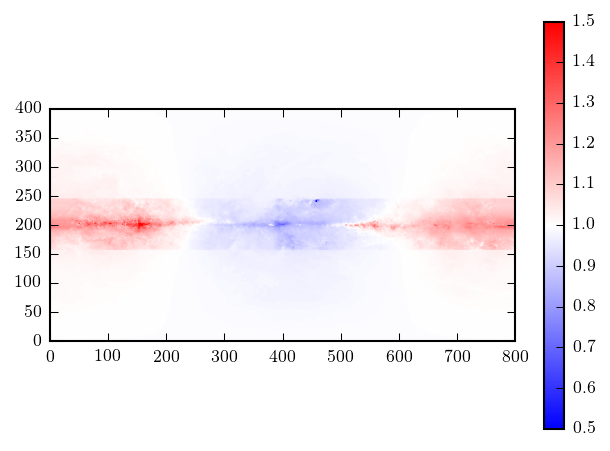

In [54]:
m = healpy.cartview(hdu_l[1].data.field(10)/hdu_k[1].data.field(10), return_projected_map=True, hold=True)
plt.clf()
plt.figure()
plt.imshow(m, origin='lower', cmap='bwr', vmin=.5, vmax=1.5)
plt.colorbar()

In [46]:
[np.isnan((hdu[1].data.field(i)) < 0).any() for i in range(38)]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [60]:

for i in range(1,10):
    hdu_k = pyfits.open('./testing_temp/pi0_decay_HIR_ring_%i_healpix_54_mod_l_4.gz'%i)
    print i, np.any([np.isnan((hdu_k[1].data.field(j))).any() for j in range(38)]), np.any([(hdu_k[1].data.field(j) < 0).any() for j in range(38)])
    


1 False

TypeError: clip() takes at least 3 arguments (1 given)

In [62]:
np.array((2,-2)).clip(0)

array([2, 0])